# Couverture de risque ou Hedging

N'oubliez pas de vous référer à la vidéo pour des explications complètes !

In [1]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Obtenir des données pour la période et les actions spécifiées
start = '2016-01-01'
end = '2017-01-01'
asset = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

In [3]:
asset_ret = asset.pct_change()[1:]
bench_ret = benchmark.pct_change()[1:]

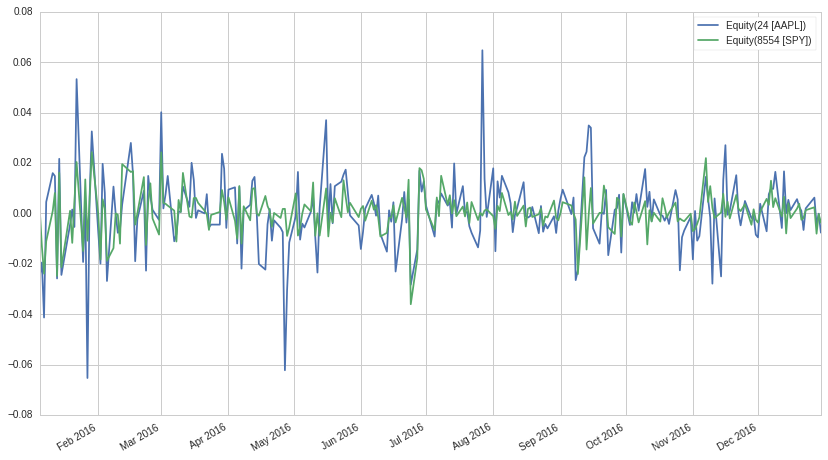

In [4]:
asset_ret.plot()
bench_ret.plot()
plt.legend()

## Régression pour les valeurs de Alpha et Beta

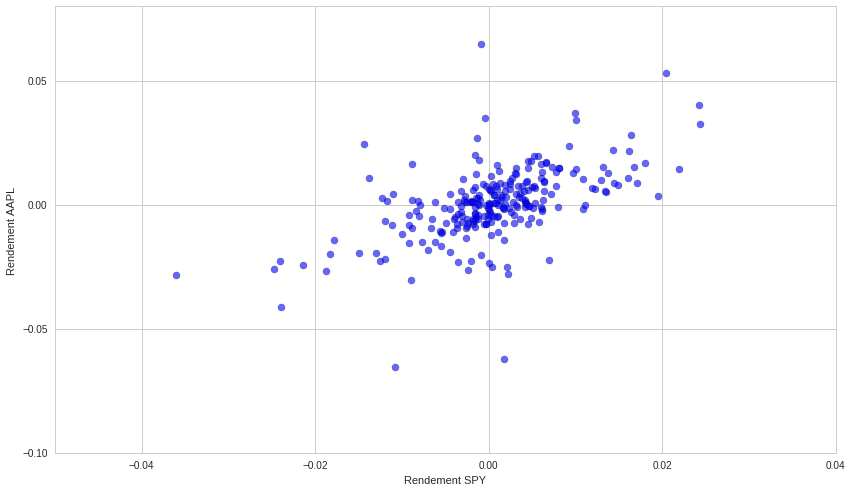

In [5]:
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)
plt.xlabel('Rendement SPY')
plt.ylabel('Rendement AAPL')

In [6]:
AAPL = asset_ret.values
spy = bench_ret.values

In [7]:
# Ajouter une constante (colonne de 1s pour l'interception)
spy_constant = sm.add_constant(spy)

# Adapter la régression aux données
model = regression.linear_model.OLS(AAPL,spy_constant).fit()

In [8]:
model.params

array([  1.67990248e-05,   1.02981370e+00])

In [9]:
alpha , beta = model.params

In [10]:
alpha

1.6799024809993564e-05

In [11]:
beta

1.0298136979465768

### Tracer Alpha et Beta

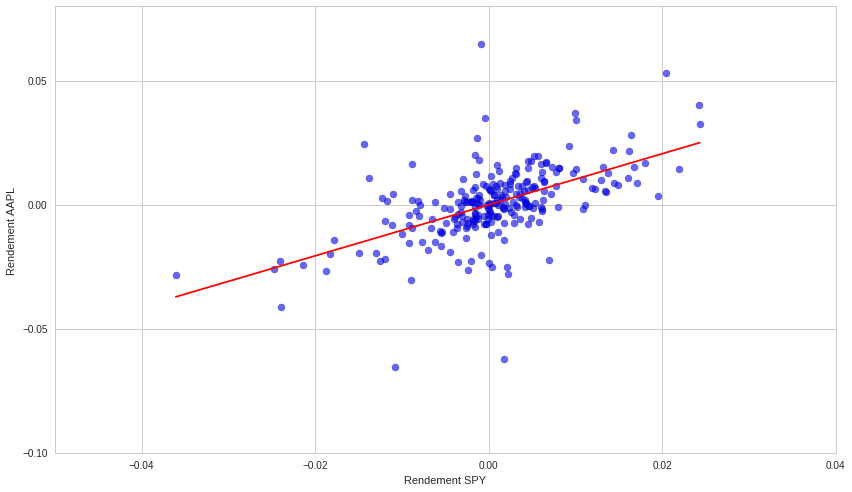

In [12]:
# Dispersion des rendements
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)

# Ligne d'ajustement
min_spy = bench_ret.values.min()
max_spy = bench_ret.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line * beta + alpha

plt.plot(spy_line,y,'r')

plt.xlabel('Rendement SPY')
plt.ylabel('Rendement AAPL')

## Implémenter la courverture de risque

In [13]:
hedged = -1*beta*bench_ret + asset_ret

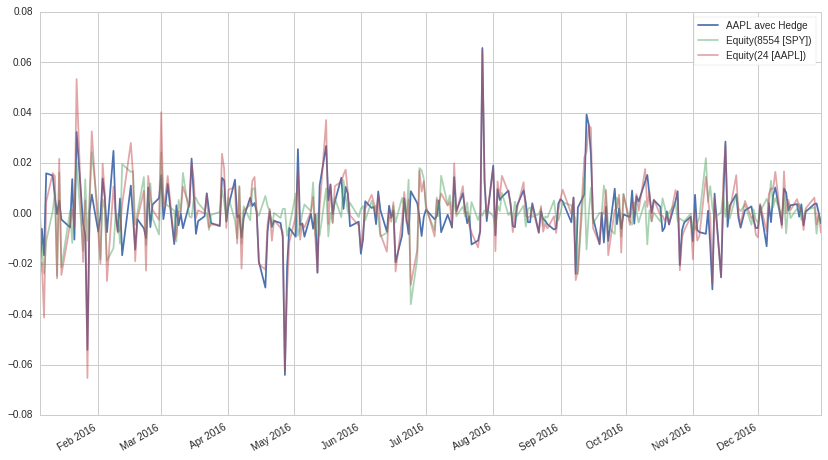

In [14]:
hedged.plot(label='AAPL avec Hedge')
bench_ret.plot(alpha=0.5)
asset_ret.plot(alpha=0.5)
plt.legend()

#### Que se passe-t-il en cas de chute importante du marché ?

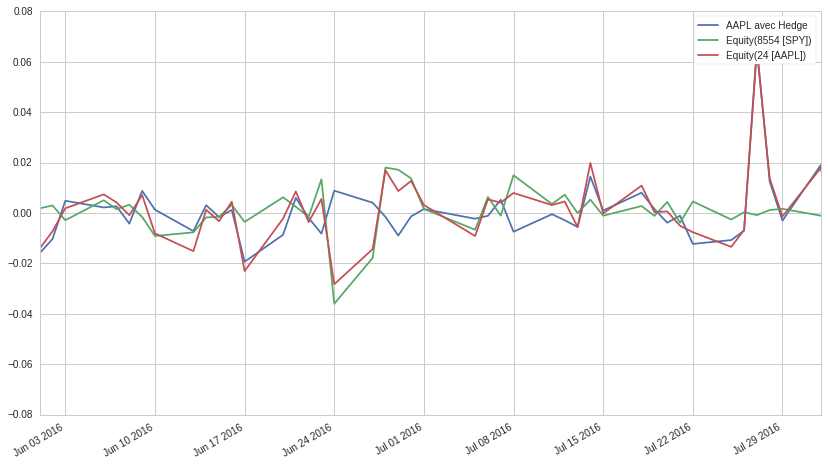

In [15]:
hedged.plot(label='AAPL avec Hedge')
bench_ret.plot()
asset_ret.plot()
plt.xlim(['2016-06-01','2016-08-01'])
plt.legend()

### Effets de la couverture du risque

In [16]:
def alpha_beta(benchmark_ret,stock):
    
    benchmark = sm.add_constant(benchmark_ret)
    
    model = regression.linear_model.OLS(stock,benchmark).fit()
    
    return model.params[0], model.params[1]

**2016-2017 Alpha et Beta**

In [17]:
# Obtenez les estimations alpha et bêta de l'année dernière
start = '2016-01-01'
end = '2017-01-01'

asset2016 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark2016 = get_pricing('SPY', fields='price', start_date=start, end_date=end)

asset_ret2016 = asset2016.pct_change()[1:]
benchmark_ret2016 = benchmark2016.pct_change()[1:]

aret_val = asset_ret2016.values
bret_val = benchmark_ret2016.values

alpha2016, beta2016 = alpha_beta(bret_val,aret_val)

print('Résultats 2016')
print('alpha: ' + str(alpha2016))
print('beta: ' + str(beta2016))

Résultats 2016
alpha: 1.679902481e-05
beta: 1.02981369795


**Création d'un portefeuille**

In [18]:
# Créer un portefeuille couvert et calculer alpha et beta
portfolio = -1*beta2016*benchmark_ret2016 + asset_ret2016

alpha, beta = alpha_beta(benchmark_ret2016,portfolio)
print('Portefeuille avec Alpha et Beta:')
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

Portefeuille avec Alpha et Beta:
alpha: 1.679902481e-05
beta: 1.36609473733e-16


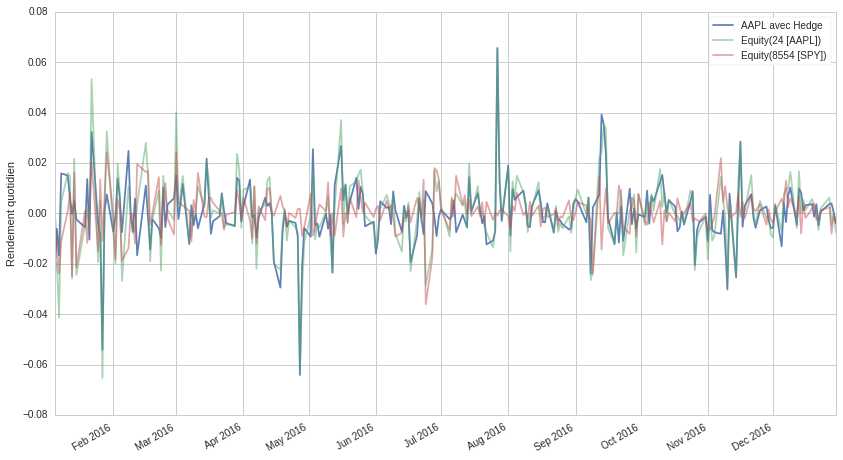

In [19]:
# Tracez les rendements du portefeuille ainsi que l'actif en lui-même
portfolio.plot(alpha=0.9,label='AAPL avec Hedge')
asset_ret2016.plot(alpha=0.5);
benchmark_ret2016.plot(alpha=0.5)
plt.ylabel("Rendement quotidien")
plt.legend();

In [20]:
portfolio.mean()

1.6799024809993652e-05

In [21]:
asset_ret2016.mean()

0.000574549568770769

In [22]:
portfolio.std()

0.012065447808277703

In [23]:
asset_ret2016.std()

0.014702747344261722

_____

**2017 Chiffres clés**

In [24]:
# Obtenir des données pour une période différente:
start = '2017-01-01'
end = '2017-08-01'

asset2017 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark2017 = get_pricing('SPY', fields='price', start_date=start, end_date=end)

asset_ret2017 = asset2017.pct_change()[1:]
benchmark_ret2017 = benchmark2017.pct_change()[1:]

aret_val = asset_ret2017.values
bret_val = benchmark_ret2017.values

alpha2017, beta2017 = alpha_beta(bret_val,aret_val)

print('Résultats 2017')
print('alpha: ' + str(alpha2017))
print('beta: ' + str(beta2017))

Résultats 2017
alpha: 0.000968854542346
beta: 1.26769880296


**Création d'un portefeuille basé sur l'estimation du bêta de 2016**

In [25]:
# Créer un portefeuille couvert et calculer alpha et beta
portfolio = -1*beta2016*benchmark_ret2017 + asset_ret2017

alpha, beta = alpha_beta(benchmark_ret2017,portfolio)
print 'Portefeuille avec Alpha et Beta hors échantillon:'
print 'alpha: ' + str(alpha)
print 'beta: ' + str(beta)

Portefeuille avec Alpha et Beta hors échantillon:
alpha: 0.000968854542346
beta: 0.23788510501


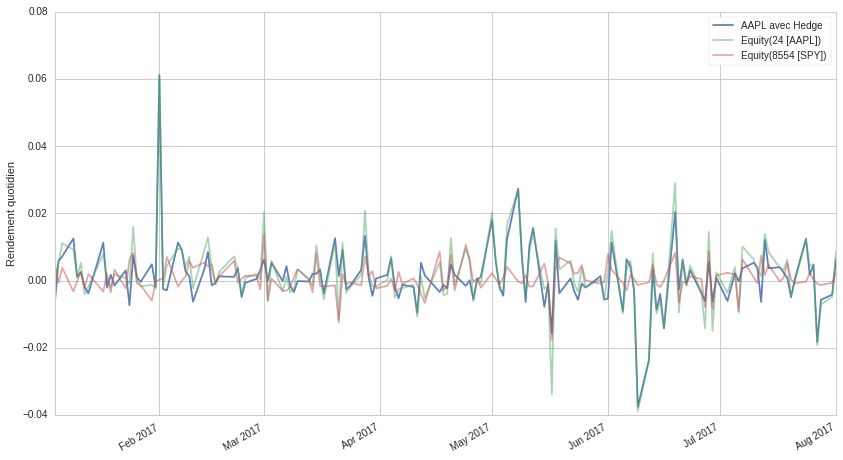

In [26]:
# Tracez les rendements du portefeuille ainsi que l'actif en lui-même
portfolio.plot(alpha=0.9,label='AAPL avec Hedge')
asset_ret2017.plot(alpha=0.5);
benchmark_ret2017.plot(alpha=0.5)
plt.ylabel("Rendement quotidien")
plt.legend();

Quels sont les effets réels ? En général, on sacrifie les rendements moyens pour une moindre volatilité, mais cela dépend aussi beaucoup du titre :

In [27]:
portfolio.mean()

0.0011399935632582228

In [28]:
asset_ret2017.mean()

0.0018808609159293456

In [29]:
portfolio.std()

0.009066375411652783

In [30]:
asset_ret2017.std()

0.010484461271996029

# Bon travail!